In [517]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [518]:
X = pd.read_csv("iris.csv")
X.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,NaN,setosa


In [519]:
y = X.pop("class").replace(["setosa", "versicolor", "virginica"], [0, 1, 2])
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [520]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
X = imputer.fit_transform(X)
print(X[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 1.3]]


In [521]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [522]:
samples, features = X_train.shape
print(f"Training set contains {samples} samples each with {features} features.")

Training set contains 112 samples each with 4 features.


In [523]:
X_train = pd.DataFrame(data=X_train, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"]) # Convert from numpy array to dataframe
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,112.000000,112.000000,112.000000,112.000000
mean,5.835714,3.059821,3.816964,1.209821
std,0.811611,0.446702,1.734384,0.755515
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.325000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [524]:
sepal_area = X_train["sepal_length"] * X_train["sepal_width"]
petal_area = X_train["petal_length"] * X_train["petal_width"]

In [525]:
# Get a boolean array of where all the respective labels are
y_train_0 = np.where(y_train==0) 
y_train_1 = np.where(y_train==1)
y_train_2 = np.where(y_train==2)

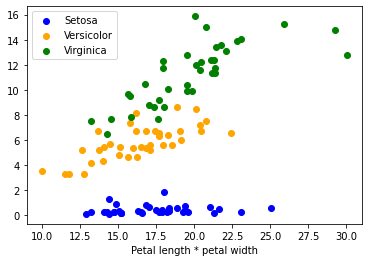

In [526]:
figure, axes = plt.subplots()
axes.scatter(sepal_area.loc[y_train_0], petal_area.loc[y_train_0], label="Setosa", color="blue")
axes.scatter(sepal_area.loc[y_train_1], petal_area.loc[y_train_1], label="Versicolor", color="orange")
axes.scatter(sepal_area.loc[y_train_2], petal_area.loc[y_train_2], label="Virginica", color="green")
axes.set_xlabel("Sepal length * sepal width")
axes.set_xlabel("Petal length * petal width")
axes.legend()

In [527]:
knn_list = []
for i in range(1, 11): # Train many KNN with different K values
    new_knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    new_knn.fit(X_train, y_train)
    knn_list.append(new_knn)

In [528]:
acc_list = []
for knn in knn_list: # Create tuples of test results
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    y_pred = knn.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred) # Confusion matrix
    acc_list.append((knn.n_neighbors, train_acc, test_acc, conf_mat))
sorted(acc_list, key=lambda x: (x[1], x[2])) # Sort according to train and test accuracy
for acc in acc_list:
    print(f"""K={acc[0]} - Train accuracy: {acc[1]}, Test accuracy: {acc[2]}, Confusion Matrix:
{acc[3]}
""")

K=1 - Train accuracy: 1.0, Test accuracy: 1.0, Confusion Matrix:
[[13  0  0]
 [ 0 12  0]
 [ 0  0 13]]

K=2 - Train accuracy: 0.9642857142857143, Test accuracy: 1.0, Confusion Matrix:
[[13  0  0]
 [ 0 12  0]
 [ 0  0 13]]

K=3 - Train accuracy: 0.9553571428571429, Test accuracy: 1.0, Confusion Matrix:
[[13  0  0]
 [ 0 12  0]
 [ 0  0 13]]

K=4 - Train accuracy: 0.9464285714285714, Test accuracy: 1.0, Confusion Matrix:
[[13  0  0]
 [ 0 12  0]
 [ 0  0 13]]

K=5 - Train accuracy: 0.9285714285714286, Test accuracy: 0.9736842105263158, Confusion Matrix:
[[12  1  0]
 [ 0 12  0]
 [ 0  0 13]]

K=6 - Train accuracy: 0.9196428571428571, Test accuracy: 0.9736842105263158, Confusion Matrix:
[[12  1  0]
 [ 0 12  0]
 [ 0  0 13]]

K=7 - Train accuracy: 0.9285714285714286, Test accuracy: 0.9736842105263158, Confusion Matrix:
[[12  1  0]
 [ 0 12  0]
 [ 0  0 13]]

K=8 - Train accuracy: 0.9196428571428571, Test accuracy: 0.9736842105263158, Confusion Matrix:
[[12  1  0]
 [ 0 12  0]
 [ 0  0 13]]

K=9 - Train

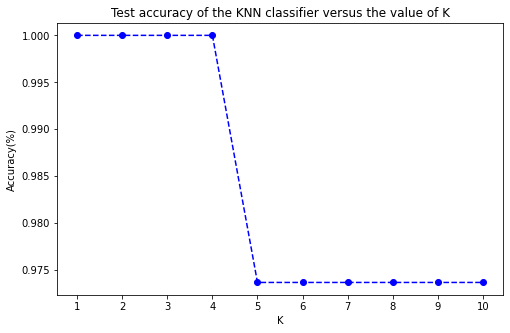

In [529]:
train_acc_list = [x[2] for x in acc_list]
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), train_acc_list, color="blue", linestyle="dashed", marker="o")
plt.xticks(range(1, 11), range(1, 11))
plt.title("Test accuracy of the KNN classifier versus the value of K")
plt.xlabel("K")
plt.ylabel("Accuracy(%)")
plt.show()